In [1]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import os
import json
import zipfile
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from textblob import Word
import wordcloud
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedsamir32179","key":"2e7b073e3401877279152830012384c0"}'}

In [4]:
! mkdir /root/.kaggle
! cp kaggle.json /root/.kaggle
! kaggle datasets download -d veleon/ham-and-spam-dataset

 74% 9.00M/12.2M [00:00<00:00, 92.6MB/s]
100% 12.2M/12.2M [00:00<00:00, 115MB/s] 


In [5]:
for file in os.listdir():
    zip_ref = zipfile.ZipFile('/content/ham-and-spam-dataset.zip', 'r')
    zip_ref.extractall()
    zip_ref.close()

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
path = '/content/hamnspam/'
mails = []
labels = []

for label in ['ham/', 'spam/']:
      filenames = os.listdir(os.path.join(path, label))
      filenames = os.listdir(path + label)
      for file in filenames:
        f = open((path + label + file), 'r', encoding = 'latin-1')
        bolk = f.read()
        mails.append(bolk)
        labels.append(label)
        
df = pd.DataFrame({'emails': mails, 'labels': labels})

In [8]:
df

emails labels
0     From ygingras@ygingras.net  Tue Sep  3 22:18:5...   ham/
1     From fork-admin@xent.com  Wed Aug 28 11:30:34 ...   ham/
2     Return-Path: tim.one@comcast.net\nDelivery-Dat...   ham/
3     From rssfeeds@jmason.org  Tue Oct  1 10:36:40 ...   ham/
4     From rpm-list-admin@freshrpms.net  Mon Sep  9 ...   ham/
...                                                 ...    ...
3047  From ilug-admin@linux.ie  Sat Sep 14 20:16:53 ...  spam/
3048  From Randy.J@hh.hosp.dk  Mon Aug 26 15:49:05 2...  spam/
3049  From ilug-admin@linux.ie  Sat Sep 21 22:04:31 ...  spam/
3050  From 12a1mailbot1@web.de  Thu Aug 22 13:17:22 ...  spam/
3051  From happy6251222@yahoo.com  Mon Aug 26 15:13:...  spam/

[3052 rows x 2 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])

In [10]:
df = df.drop_duplicates()

In [11]:
def cleaning(df,stop_words):
  df['emails']=df['emails'].apply(lambda x:" ".join(x.lower()for x in x.split()))
  df['emails']=df['emails'].str.replace('[^\w\s]','')
  df['emails']=df['emails'].str.replace('\d','')
  df['emails']=df['emails'].apply(lambda x:" ".join([x for x in x.split()if x not in stop_words]))
  df['emails']=df['emails'].apply(lambda x:" ".join(Word(x).lemmatize()for x in x.split()))
  return df
stop_words=stopwords.words('english')
df=cleaning(df,stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [12]:
df

emails  labels
0     ygingrasygingrasnet tue sep returnpath ygingra...       0
1     forkadminxentcom wed aug returnpath forkadminx...       0
2     returnpath timonecomcastnet deliverydate fri s...       0
3     rssfeedsjmasonorg tue oct returnpath rssfeedse...       0
4     rpmlistadminfreshrpmsnet mon sep returnpath rp...       0
...                                                 ...     ...
3047  ilugadminlinuxie sat sep returnpath ilugadminl...       1
3048  randyjhhhospdk mon aug returnpath randyjhhhosp...       1
3049  ilugadminlinuxie sat sep returnpath ilugadminl...       1
3050  amailbotwebde thu aug returnpath amailbotwebde...       1
3051  happyyahoocom mon aug returnpath happyyahoocom...       1

[3047 rows x 2 columns]

In [13]:
common_words=''
for i in df.emails:
  i=str(i)
  tokens=i.split()
  common_words+=' '.join(tokens)+' '
common_words

'ygingrasygingrasnet tue sep returnpath ygingrasygingrasnet deliveredto yyyylocalhostexamplecom received localhost jalapeno jmasonorg postfix esmtp id aefb jmlocalhost tue sep ist received jalapeno localhost imap fetchmail jmlocalhost singledrop tue sep ist received outgoingsecurityfocuscom outgoingsecurityfocuscom dogmaslashnullorg esmtp id gkuuz jmjmasonorg tue sep received listssecurityfocuscom listssecurityfocuscom outgoingsecurityfocuscom postfix qmqp id bacfc tue sep mdt mailinglist contact secproghelpsecurityfocuscom run ezmlm precedence bulk listid secproglistidsecurityfocuscom listpost mailtosecprogsecurityfocuscom listhelp mailtosecproghelpsecurityfocuscom listunsubscribe mailtosecprogunsubscribesecurityfocuscom listsubscribe mailtosecprogsubscribesecurityfocuscom deliveredto mailing list secprogsecurityfocuscom deliveredto moderator secprogsecurityfocuscom received qmail invoked network sep contenttype textplain charsetiso yannick gingras ygingrasygingrasnet secprogsecurityf

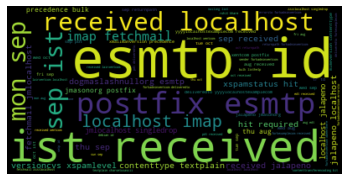

In [14]:
worldcloud=wordcloud.WordCloud().generate(common_words)
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
tokenizer=Tokenizer(num_words=8000,split=' ')
tokenizer.fit_on_texts(df['emails'].values)
x=tokenizer.texts_to_sequences(df['emails'].values)
x=pad_sequences(x)

In [16]:
x.shape

(3047, 6929)

In [17]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(8001, 256, input_length=x.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6929, 256)         2048256   
                                                                 
 bidirectional (Bidirectiona  (None, 6929, 256)        394240    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 6929, 256)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [18]:
y=df['labels']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [19]:
cb=TensorBoard()
history=model.fit(x_train,y_train,epochs=3,batch_size=10,callbacks=cb,validation_data=[x_test,y_test])

Epoch 1/3
244/244 [==============================] - 792s 3s/step - loss: 0.1591 - accuracy: 0.9516 - val_loss: 0.0328 - val_accuracy: 0.9885
Epoch 2/3
244/244 [==============================] - 780s 3s/step - loss: 0.0635 - accuracy: 0.9873 - val_loss: 0.0226 - val_accuracy: 0.9951
Epoch 3/3
244/244 [==============================] - 779s 3s/step - loss: 0.0174 - accuracy: 0.9967 - val_loss: 0.0371 - val_accuracy: 0.9918


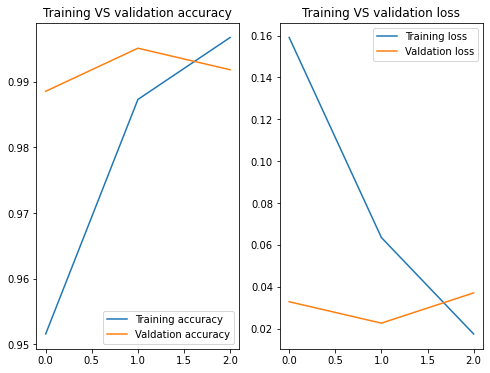

In [21]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
los=history.history['loss']
val_los=history.history['val_loss']
epochs_range=range(3)
plt.figure(figsize=( 8,6))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training accuracy')
plt.plot(epochs_range,val_acc,label='Valdation accuracy')
plt.title("Training VS validation accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs_range,los,label='Training loss')
plt.plot(epochs_range,val_los,label='Valdation loss')
plt.title("Training VS validation loss")
plt.legend()
plt.show()

In [22]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,y_pred,target_names=("Important","Spam" )))

              precision    recall  f1-score   support

   Important       1.00      0.99      1.00       504
        Spam       0.96      0.99      0.98       106

    accuracy                           0.99       610
   macro avg       0.98      0.99      0.99       610
weighted avg       0.99      0.99      0.99       610



In [25]:
mat=confusion_matrix(y_test,y_pred)
print(mat)

[[500   4]
 [  1 105]]


In [27]:
model.save('spam.hdf5')